<a href="https://colab.research.google.com/github/GabrielChuchuca/SIMULACION/blob/main/TareaFIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de Matplot para graficas y de Reportes pagermill

A continuación se detalla un pequeño tutorial de como utilizar matplotlib y pagermill para la generacion de graficas y reportes respectivamente, este tutorial se basa en tres librerias:
- Matplotlib
- Numpy
- Pandas

Al finalizar el estudiante estará en la capacidad de generar graficas y enviar parametros para la realización de reportes utilizando Notebook. Además permite la lectura de archivos .csv y de diferentes tipos de graficos.


In [50]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Cómo conectar el cuaderno a la la Unidad de Google Drive
import os

# Importamos el paquete propio de Google Colab para acceder a la Unidad
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Construccion de un grafico basico

Para la contriccion de este primer grafico utilizaremos dos arreglos

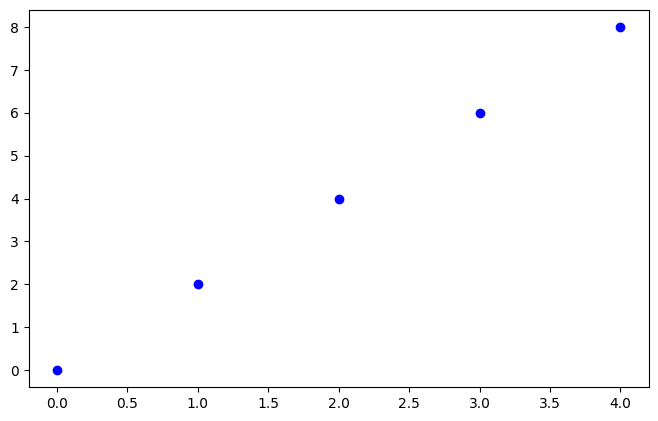

In [2]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Asignamos un tamaño y el numero de pixeles por pulgada.
plt.figure(figsize=(8,5), dpi=100)

# Graficos en formato punto 
plt.plot(x,y,'bo')


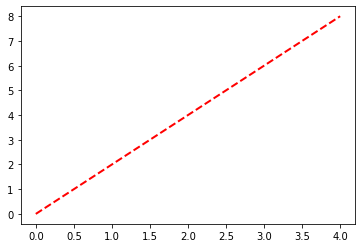

In [3]:
#Para graficar en un formato linea utilizamos el siguiente comando

#Graficamos linea
plt.plot(x,y, color='red', linewidth=2, linestyle='--', label='Linea')
plt.show()

No handles with labels found to put in legend.
findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


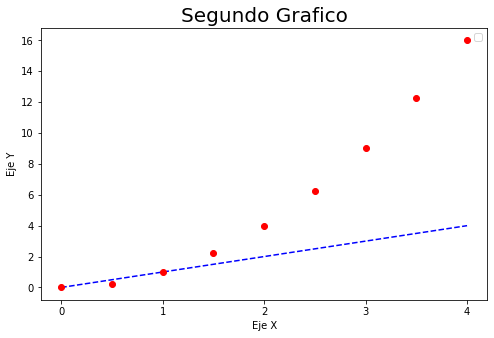

In [4]:
# Generar un rango de puntos para ello vamos a utilizar np.arange(inicio, fin, paso)

x2 = np.arange(0,4.5,0.5)
y2 = np.arange(0,4.5,0.5)


plt.figure(figsize=(8,5))
plt.title('Segundo Grafico', fontdict={'fontname':'Comic Sans MS', 'fontsize': 20})
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

#Graficar
plt.plot(x2,y2,'b--')
#Segunda linea con puntos y elevado al cuadrado el arreglo x2
plt.plot(x2,x2**2,'ro')
# Asignar Escala de eje en X
plt.xticks([0,1,2,3,4])
#Agregar la leyenda al grafico
plt.legend()

#Guardar la imagen en un archivo
plt.savefig('segundografico.png',dpi=300)

plt.show()


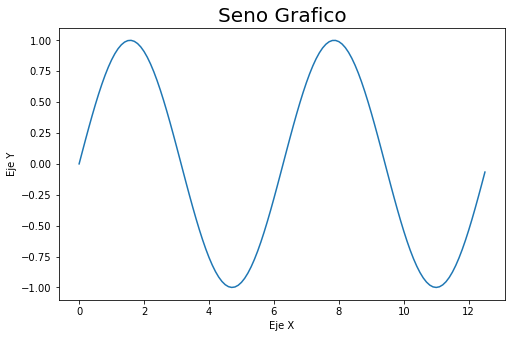

In [5]:
# Graficar funciones matematicas

x3 = np.arange(0, 4*np.pi,0.1)
y3 = np.sin(x3)

plt.figure(figsize=(8,5))
plt.title('Seno Grafico', fontdict={'fontname':'Comic Sans MS', 'fontsize': 20})
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.plot(x3,y3)
plt.show()

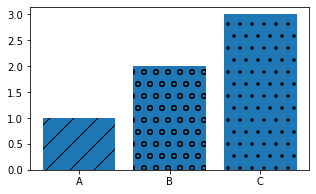

In [6]:
#Grafico de Barras
etiquetas = ['A', 'B', 'C']
valores = np.arange(1,4,1)
plt.figure(figsize=(5,3))
barras = plt.bar(etiquetas, valores)

#Patrones dentro de las barras
patrones = ['/', 'o', '.']
for bar in barras:
    bar.set_hatch(patrones.pop(0))

plt.show()    
    

No handles with labels found to put in legend.


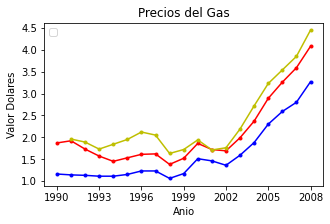

In [8]:
#Trabajar con datos en formato .csv

#datos = pd.read_csv('gas_precios.csv')
datos = pd.read_csv('/content/drive/MyDrive/gas_precios.csv')

plt.figure(figsize=(5,3))

plt.title('Precios del Gas')

plt.plot(datos.Year, datos.USA, 'b.-')
plt.plot(datos.Year, datos.Canada, 'r.-')
plt.plot(datos.Year, datos.Australia, 'y.-')

plt.xticks(datos.Year[::3].tolist())

plt.xlabel('Anio')
plt.ylabel('Valor Dolares')
plt.legend()
plt.show()


In [9]:
#Trabajar con otro tipo de datos Fifa
#fifa = pd.read_csv('fifa_datos.csv')
fifa = pd.read_csv('/content/drive/MyDrive/fifa_datos.csv')
#imprimir los primeros 5 datos del archivo
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


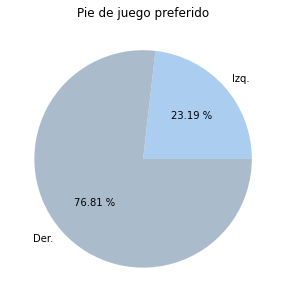

In [10]:
# Generar un grafico de cual es su pie diestro

izquierdo = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
derecho = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.figure(figsize=(8,5))

etiquetas = ['Izq.', 'Der.']
colores = ['#abcdef', '#aabbcc']
plt.pie([izquierdo, derecho], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Pie de juego preferido')
plt.show()


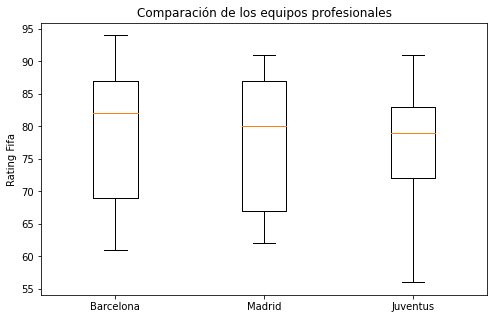

In [11]:
# Cuadro de barras y bigotes

plt.figure(figsize=(8,5))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
juventus = fifa.loc[fifa.Club == 'Chelsea']['Overall']
bp = plt.boxplot([barcelona, madrid, juventus], labels=['Barcelona', 'Madrid', 'Juventus'])
plt.title('Comparación de los equipos profesionales')
plt.ylabel('Rating Fifa')
plt.show()


## Tarea

1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior



41
2290
10876
4952


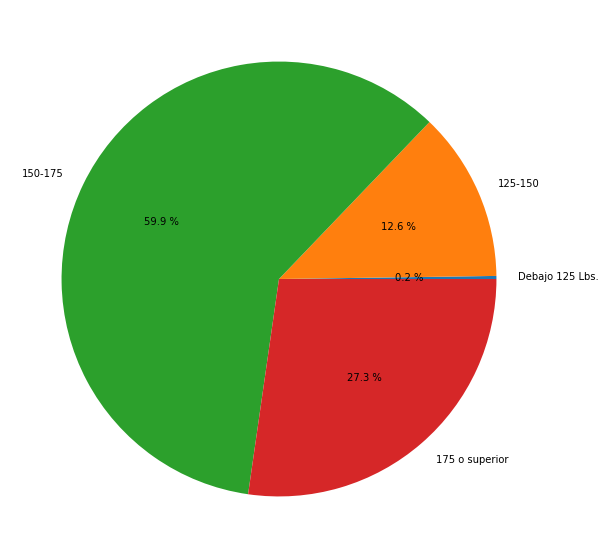

In [56]:
pri = 0
seg = 0
ter = 0
cua = 0
n = 0
try:
  for i in fifa['Weight']:
    if (pd.isna(i) == True):
      n = n + 1 
    elif (float(i[:3]) < 125.0):
      pri = pri + 1
    elif (float(i[:3]) >= 125.0 and int(i[:3]) < 150.0):
      seg = seg + 1
    elif (float(i[:3]) >= 150.0 and int(i[:3]) < 175.0):
      ter = ter + 1
    elif (float(i[:3]) >= 175.0):
      cua = cua + 1
except TypeError:
  pass
b = np.array([pri, seg, ter, cua])
a = np.array(["Debajo 125 Lbs.", "125-150", "150-175", "175 o superior"])
#print(n)
print(pri)
print(seg)
print(ter)
print(cua)
#print(n+pri+seg +ter+cua)
plt.pie(b, labels=a, autopct="%0.1f %%")
plt.gcf().set_size_inches(50, 10)
plt.show()

2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90
* 100


0
103
649
889
143
5
0


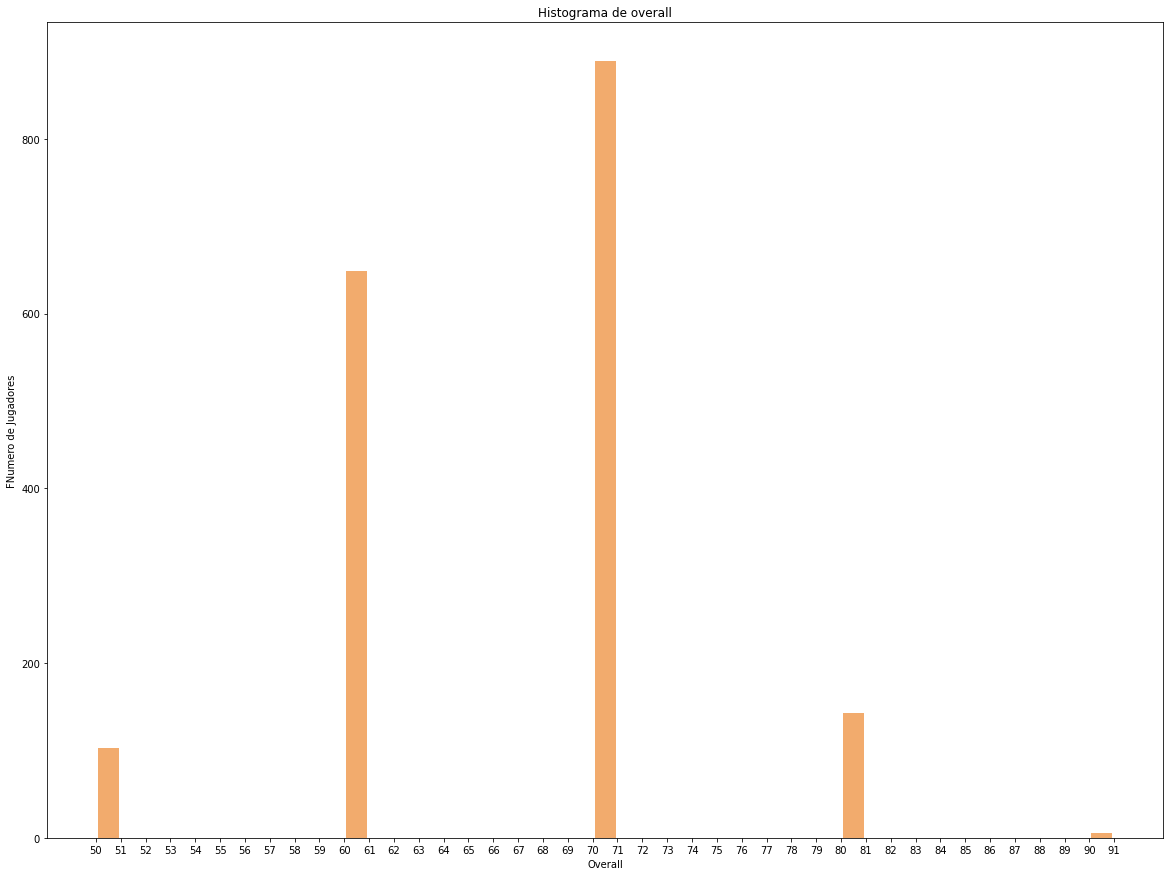

In [72]:
l = []
for i in fifa['Overall']:
  if i == 40:
    l.append(i)
  elif i == 50:
    l.append(i)
  elif i == 60:
    l.append(i)
  elif i == 70:
    l.append(i)
  elif i == 80:
    l.append(i)
  elif i == 90:
    l.append(i)  
  elif i == 100:
    l.append(i)
intervalos = range(min(l), max(l) + 2)
print(l.count(40))
print(l.count(50))
print(l.count(60))
print(l.count(70))
print(l.count(80))
print(l.count(90))
print(l.count(100))
plt.hist(x=l, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.gcf().set_size_inches(20, 15)
plt.title('Histograma de overall')
plt.xlabel('Overall')
plt.ylabel('FNumero de Jugadores')
plt.xticks(intervalos)
plt.show() #dibujamos el histograma

3 Investigar como pasar parametros y generar reportes utilizando Notebook, una de las formas es utilizar papermill